## Initial Data Exploration

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
data = pd.read_csv('Data/spotify_data_w_genres.csv')
data.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [3]:
print(data.shape)

#see what type of features we're working with
print(data.nunique())

(32539, 16)
artists             32539
acousticness        15351
danceability        10890
duration_ms         26668
energy              12522
instrumentalness    16229
liveness            12958
loudness            23282
speechiness         11939
tempo               26451
valence             12385
popularity           4542
key                    12
mode                    2
count                 389
genres              10841
dtype: int64


In [4]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,32539.000000,32539.000000,3.253900e+04,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000
mean,0.455682,0.552737,2.485982e+05,0.525908,0.233281,0.209035,-11.008171,0.092047,117.433745,0.498812,24.473452,5.459787,0.734903,12.561818
std,0.383678,0.176445,1.581808e+05,0.267402,0.334487,0.151781,5.568630,0.111257,24.467506,0.247154,23.021041,3.473653,0.441392,52.407821
min,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.055155,0.436487,1.804616e+05,0.299000,0.000012,0.109000,-13.792500,0.039700,100.983500,0.305792,0.000000,2.000000,0.000000,2.000000
50%,0.391833,0.563000,2.215070e+05,0.537375,0.009550,0.162000,-9.887000,0.052822,118.779000,0.506000,22.666667,6.000000,1.000000,2.000000
75%,0.876000,0.684500,2.815870e+05,0.747039,0.451149,0.259500,-6.944500,0.090800,130.552000,0.691500,43.141941,8.000000,1.000000,7.000000
max,0.996000,0.987000,4.696690e+06,1.000000,1.000000,0.986000,3.367000,0.971000,219.833000,0.997000,94.000000,11.000000,1.000000,3179.000000


super interesting that popularity has a mean of 24.5 and std of 23! That could make it difficult 
to choose the best way to bin these

C:\Users\danar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


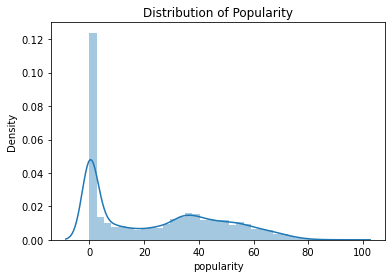

In [5]:
#Look at distribution of popularity

sns.distplot(data['popularity']);
plt.title('Distribution of Popularity');

C:\Users\danar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Success Score')

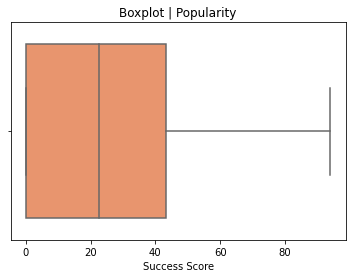

In [6]:
sns.boxplot(data['popularity'], palette = 'OrRd_r');
plt.title('Boxplot | Popularity');
plt.xlabel('Success Score')

In [7]:
#create bins for popularity so I can use as my target variable with classifier models 

#df['popularity_bin'] = pd.qcut(df['popularity'], q = 3)
#df['popularity_bin'].value_counts()

In [8]:
#try a different way of assigning popularity based on the quantiles from the boxplot above

def label_popularity(lst):
    outputs = []
    for item in lst:
        if item <= 24:
            outputs.append('Unsuccessful')
        if item > 24:
            if item <= 44:
                outputs.append('Successful')
            if item > 44:
                outputs.append('Very Successful')
    return outputs

#create a list of the popularity numbers so that I can use logical arguments 
list_pop = list(data['popularity'])
popularity_labels = label_popularity(list_pop)

#add the new popularity labels to the dataframe
data['popularity_labels'] = popularity_labels
data.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,popularity_labels
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes'],Successful
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[],Successful
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[],Successful
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[],Successful
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[],Successful


In [9]:
#how useful is the genre column as is? 
data.genres.value_counts()

[]                                                                                                                                                        13563
['movie tunes']                                                                                                                                              68
['show tunes']                                                                                                                                               53
['orchestral performance']                                                                                                                                   47
['hollywood']                                                                                                                                                46
                                                                                                                                                          ...  
['boom bap', 'east coast hip hop', 'gang

In [10]:
#not very useful! pulling the first item of each list in hopes of grouping genres
df_melt = data.assign(genres = data.genres.str.split(','))
series_genre = df_melt.genres.apply(pd.Series)
series_genre.to_csv('Data/series_genre.csv')
genre = pd.read_csv('Data/series_genre.csv', index_col = 'Unnamed: 0')

In [11]:
#adding the clean genre list to the dataframe and dropping the original genres column
data['clean_genre'] = genre['0']
data.drop('genres', axis = 1, inplace = True)
data.replace(to_replace = '[]', value = 'No Genre', inplace = True)
data.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,popularity_labels,clean_genre
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,Successful,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,Successful,No Genre
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,Successful,No Genre
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,Successful,No Genre
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,Successful,No Genre


In [12]:
#compare value counts to the original column - this looks much more useful
data['clean_genre'].value_counts()

No Genre                         13563
['dance pop'                       389
['adult standards'                 350
['album rock'                      315
['alternative metal'               263
                                 ...  
['acoustic guitar cover']            1
['french indie pop']                 1
['danish experimental'               1
['italian progressive metal']        1
['swedish death metal'               1
Name: clean_genre, Length: 3131, dtype: int64

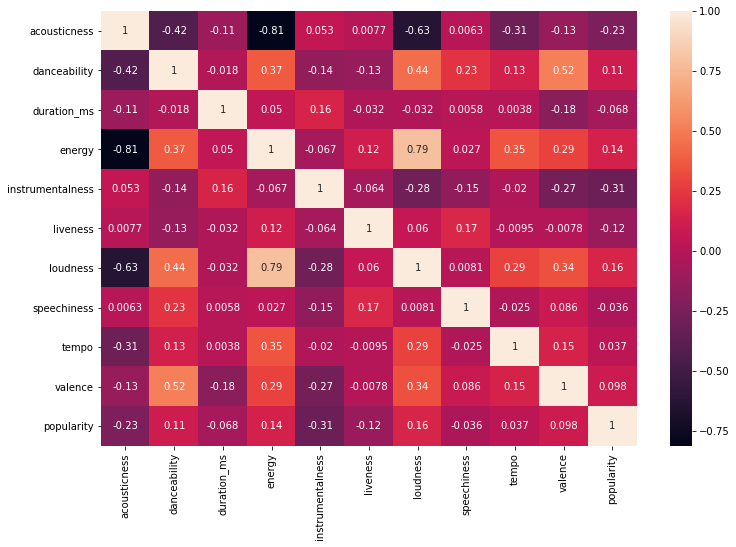

In [13]:
#check for multicollinearity

cat_var = ['popularity_labels', 'count', 'mode', 'key', 'artists', 'clean_genre']

data_no_cat = data.drop(columns = cat_var)

corr = data_no_cat.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True);

Features with ml issues: 
1. energy | acousticness
2. loudness | energy

In [14]:
#look at correlation between continuous feature and target variables, 
#especially interested in those with high multicollinearity

from scipy.stats import pearsonr
cor = pearsonr

features = list(data_no_cat.columns)
features.pop() #removing popularity from list of features 

for feature in features: 
    correlation, _ = cor(data[feature], data['popularity'])
    print(feature + ' correlation w target: {}'.format(correlation.round(3)))

acousticness correlation w target: -0.234
danceability correlation w target: 0.108
duration_ms correlation w target: -0.068
energy correlation w target: 0.137
instrumentalness correlation w target: -0.312
liveness correlation w target: -0.118
loudness correlation w target: 0.162
speechiness correlation w target: -0.036
tempo correlation w target: 0.037
valence correlation w target: 0.098


Loudness, energy, and acousticness have the highest multicollinearity. 
Correlation with popularity: 
1. acousticness: -.23
2. loudness: .162
3. energy: .137

Because energy has the least impact on our variable and is the root of ml issues - drop it from the dataset or create interaction

In [15]:
#add interaction
energy_interaction = data['energy'] * data['loudness']
data['energy_loudness'] = energy_interaction

In [16]:
#take a random sample of the data for clearer visualization (20% of total data)
viz_sample = data.sample(n = 6500, random_state = 10)
viz_sample.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,popularity_labels,clean_genre,energy_loudness
2289,Avelino Muñoz,0.669686,0.724431,169092.607843,0.514569,0.304148,0.171427,-11.317529,0.139855,108.892314,0.719118,0.0,7,1,51,Unsuccessful,No Genre,-5.823646
15571,King Oliver Jazz Band,0.994000,0.573000,168000.000000,0.444000,0.689000,0.510000,-7.351000,0.150000,138.769000,0.858000,0.0,4,0,2,Unsuccessful,['big band',-3.263844
22673,Popatlal,0.992000,0.573000,164403.000000,0.146000,0.001460,0.174000,-8.690000,0.354000,78.940000,0.663000,0.0,4,0,2,Unsuccessful,No Genre,-1.268740
7147,Dennis Pedersen,0.000096,0.390000,110520.000000,0.998000,0.930000,0.180000,-5.848000,0.075200,138.998000,0.711000,3.0,1,1,1,Unsuccessful,No Genre,-5.836304
10385,Gene Loves Jezebel,0.023161,0.564500,246873.500000,0.881000,0.018150,0.215000,-6.457000,0.036150,121.095500,0.685500,22.5,11,0,4,Unsuccessful,['dance rock',-5.688617


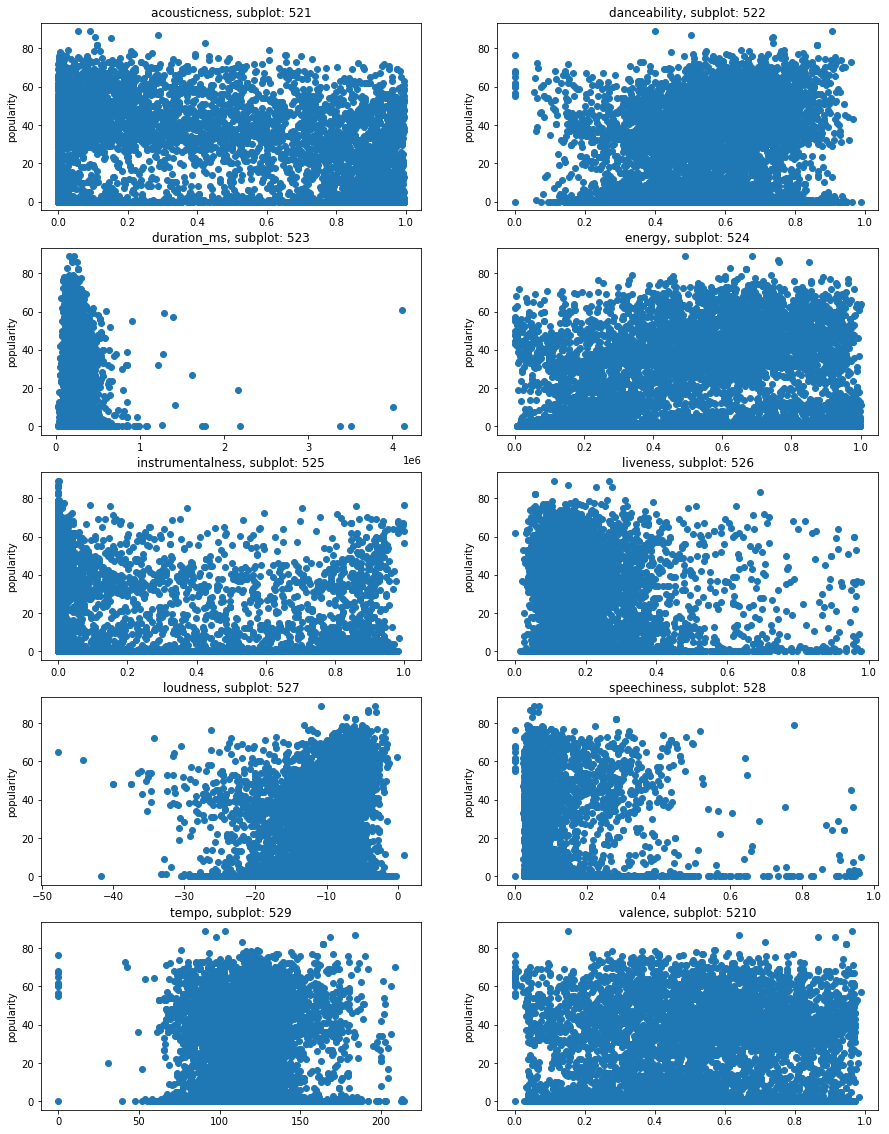

In [17]:
#scatter matrix of continuous features w/ target

fig, axs = plt.subplots(2,5, figsize=(15, 20), facecolor='w', edgecolor='k')

a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

for i, feat in enumerate(features):
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(feat, a, b, c))
    plt.ylabel('popularity')
    plt.scatter(x = feat, y = 'popularity', data = viz_sample)
    c = c + 1

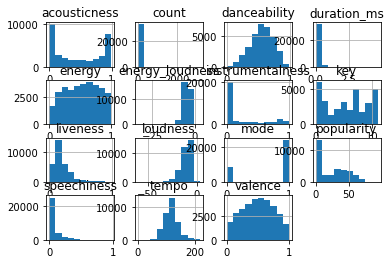

In [18]:
#quick distribution check
data.hist();

In [19]:
# Moved scaling after train test split 

#ss = StandardScaler()

#scaled = ss.fit_transform(data_no_cat)
#scaled_data = pd.DataFrame(scaled, columns = list(data_no_cat.columns))
#scaled_data['genre'] = data['clean_genre']
#scaled_data['mode'] = data['mode']
#scaled_data['key'] = data['key']
#scaled_data.head()

In [20]:
data.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,popularity_labels,clean_genre,energy_loudness
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,Successful,['show tunes'],-5.430227
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,Successful,No Genre,-4.348774
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,Successful,No Genre,-4.364688
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,Successful,No Genre,-3.843694
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,Successful,No Genre,-4.998441


In [21]:
from statsmodels.formula.api import ols

# Instantiate the model
linreg = LinearRegression()

formula = 'popularity ~ acousticness+ danceability + duration_ms + instrumentalness + liveness + speechiness + tempo + valence + key + mode'

model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     678.7
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:41:14   Log-Likelihood:            -1.4514e+05
No. Observations:               32539   AIC:                         2.903e+05
Df Residuals:                   32528   BIC:                         2.904e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           51.6053      0.935     55.177      0.000      49.772      53.438
acousticness       -15.5188      0.361    -42.996      0.000     -16.226     -14.811
danceability        -6.4079      0.898     -7.132      0.000      -8.169      -4.647
duration_ms      -7.141e-06    7.6e-07     -9.392      0.000   -8.63e-06   -5.65e-06
instrumentalness   -21.4411      0.368    -58.234      0.000     -22.163     -20.719
liveness           -20.6414      0.795    -25.961      0.000     -22.200     -19.083
speechiness         -9.9302      1.118     -8.884      0.000     -12.121      -7.739
tempo               -0.0426      0.005     -8.460      0.000      -0.053      -0.033
valence              0.5573      0.585      0.953      0.341      -0.589       1.704
key                 -0.0811      0.034     -2.408      0.016      -0.147      -0.015
mode                 0.8958      0.270      3.317      0.001       0.367       1.425
==============================================================================
Omnibus:                     1867.806   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1122.074
Skew:                           0.319   Prob(JB):                    2.21e-244
Kurtosis:                       2.351   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#removing key

formula = 'popularity ~ acousticness+ danceability + duration_ms + instrumentalness + liveness + speechiness + tempo + valence + mode'

model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     753.4
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:41:16   Log-Likelihood:            -1.4515e+05
No. Observations:               32539   AIC:                         2.903e+05
Df Residuals:                   32529   BIC:                         2.904e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           51.1095      0.912     56.018      0.000      49.321      52.898
acousticness       -15.4956      0.361    -42.944      0.000     -16.203     -14.788
danceability        -6.4074      0.898     -7.131      0.000      -8.168      -4.646
duration_ms      -7.153e-06    7.6e-07     -9.407      0.000   -8.64e-06   -5.66e-06
instrumentalness   -21.4485      0.368    -58.252      0.000     -22.170     -20.727
liveness           -20.6153      0.795    -25.929      0.000     -22.174     -19.057
speechiness         -9.9617      1.118     -8.912      0.000     -12.153      -7.771
tempo               -0.0425      0.005     -8.444      0.000      -0.052      -0.033
valence              0.5232      0.585      0.895      0.371      -0.623       1.669
mode                 0.9665      0.268      3.600      0.000       0.440       1.493
==============================================================================
Omnibus:                     1865.163   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1124.125
Skew:                           0.320   Prob(JB):                    7.93e-245
Kurtosis:                       2.352   Cond. No.                     3.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I was hoping that I could use linear regression to inform my future logistic regression - but it doesn't seem to be very helpful. My first thought, after seeing this very low R2, is that I won't be able to prove that these features impact song popularity. 

For now, I'm going to move on to logistic regression and hope for more success there 

In [23]:
#originally thought that the target would need to be numbers - but the results are clearer if kept as strings

#sd_data['popularity_labels'].replace(to_replace = 'Very Successful', value = '3', inplace = True)
#sd_data['popularity_labels'].replace(to_replace = 'Successful', value = '2', inplace = True)
#sd_data['popularity_labels'].replace(to_replace = 'Unsuccessful', value = '1', inplace = True)R

In [24]:
#sd_data['popularity_labels'].astype('int64')

## First Model using Logistic Regression

In [25]:
#add dummies for categorical data 
cats = ['key', 'clean_genre']
data = pd.get_dummies(data, columns = cats, drop_first = True)

In [26]:
#create train test splits before logistic modeling
X = data.drop(columns = ['popularity_labels', 'popularity', 'artists'], axis = 1)
y= data['popularity_labels']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42, stratify = y)

In [28]:
ss = StandardScaler()

ss_X_train = ss.fit_transform(X_train)
ss_X_test = ss.transform(X_test)

In [29]:
#apply min max scaler
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

mm_X_train = minmax.fit_transform(X_train)
mm_X_test = minmax.transform(X_test)

In [ ]:
#instantiate logistic regression
log_regr = LogisticRegression(multi_class='multinomial', solver='saga', max_iter = 700)

#fit and predict
log_regr.fit(ss_X_train, y_train)
y_hat = log_regr.predict(ss_X_test)

In [ ]:
#build a confusion matrix to evaluate performance 
cnf_matrix = confusion_matrix(y_test, y_hat)
print('Confusion Matrix:\n', cnf_matrix)

In [ ]:
cmv = plot_confusion_matrix

cmv(log_regr, X_test, y_test, cmap = 'OrRd', labels = ['Unsuccessful', 'Successful', 'Very Successful']);
print('Recall Score: {}'.format(recall_score(y_test, y_hat, average = 'macro').round(3)))
print('Precision Score: {}'.format(precision_score(y_test, y_hat, average = 'macro').round(3)))
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_hat).round(3)))

These results are extremely imbalanced. The model is clearly biased toward the unsuccessful class, which is also the largest. 

In [ ]:
#Would like to try OVR instead of multinomial

#instantiate
log_regOVR = LogisticRegression(multi_class='ovr', solver='saga', max_iter = 700)

#fit and predict
log_regOVR.fit(X_train, y_train)
y_hatOVR = log_regOVR.predict(X_test)

cmv(log_regOVR, ss_X_test, ss_y_test, cmap = 'OrRd', labels = ['Unsuccessful', 'Successful', 'Very Successful']);
print('Recall Score: {}'.format(recall_score(y_test, y_hatOVR, average = 'macro').round(3)))
print('Precision Score: {}'.format(precision_score(y_test, y_hatOVR, average = 'macro').round(3)))
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_hatOVR).round(3)))

One vs Rest performed about the same as multinomial for this dataset

Final thoughts here before circling back to the start in hopes of improving model performance:
1. there's a bit of multicolinearity that's not been addressed yet, try removing energy 
2. genre could be really helpful in classifying what songs will be successful, but will need a lot of cleaning before it's really useful
3. would like to run a gridsearch to make sure all the right features are being used

In [ ]:
data.to_csv('Data/data.csv')